Import all necessary packages.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#Load our dataframe account for the index columns
df = pd.read_csv('case_study.csv', index_col=[0])

/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (171) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


In [4]:
# Quickly check to see the size of our DF, both rows and columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34545 entries, 49938 to 303778
Columns: 358 entries, _STATE to _AIDTST3
dtypes: float64(352), int64(5), object(1)
memory usage: 94.6+ MB


In [5]:
df.shape

(34545, 358)

## Subset your dataframe to only include the states in the tri-state area (NJ, CT, NY)

In [6]:
df._STATE.unique()

array([ 9., 34., 36.])

Now check to see how large our subset df.

**PHYSHLTH** is the column we are interested in for this analysis, so let's start to investigate the column. Since we have a data cookbook, a.k.a. data dictionary) we want to start there before looking at the code. 

In [7]:
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

## 1. Handle the non-normal values

As you can see from the data dictionary, there are a number of responses that are coded with values that could throw off our descriptive statistics.  Let's clean up by mapping the responses to a more appropriate value, and handling any missing values.  

In [8]:
df.isna().sum()

_STATE          0
FMONTH          0
IDATE           0
IMONTH          0
IDAY            0
            ...  
_RFSEAT2        0
_RFSEAT3        0
_FLSHOT6    22334
_PNEUMO2    22334
_AIDTST3     3773
Length: 358, dtype: int64

Create a Subset data with applicable values. I.E State, and Physical Health

In [9]:
temp = df[['PHYSHLTH']]
df_phy = pd.concat([df[['_STATE']], temp], axis = 1)


In [10]:
df_phy

,_STATE,PHYSHLTH
49938,9.0,88.0
49939,9.0,88.0
49940,9.0,2.0
49941,9.0,88.0
49942,9.0,88.0
...,...,...
303774,36.0,88.0
303775,36.0,88.0
303776,36.0,6.0
303777,36.0,88.0


1. Replace the values '88' with '0' to show that the value means that those asked took no days off.
2. Replace the values of poeple that refused to anwser to Null, because its such a small set of data that removing its values would have a small affect of the data set.
3. Replace the values that are blank with Null for the same reason listed above. 

In [11]:
df_phy['PHYSHLTH'] = df_phy['PHYSHLTH'].replace(88,0)

In [12]:
df_phy['PHYSHLTH'] = df_phy['PHYSHLTH'].replace(99, None)

In [13]:
df_phy['PHYSHLTH'] = df_phy['PHYSHLTH'].replace('BLANK', None)

Drop Null Values.

In [14]:
df_phy['PHYSHLTH'] = df_phy['PHYSHLTH'].dropna()

Change the state values from a number to a recognizable string. 

In [15]:
df_phy['_STATE'] = df_phy['_STATE'].replace(9, 'CT')

In [16]:
df_phy['_STATE'] = df_phy['_STATE'].replace(34, 'NJ')

In [17]:
df_phy['_STATE'] = df_phy['_STATE'].replace(36, 'NY')

In [18]:
df_phy

,_STATE,PHYSHLTH
49938,CT,0.0
49939,CT,0.0
49940,CT,2.0
49941,CT,0.0
49942,CT,0.0
...,...,...
303774,NY,0.0
303775,NY,0.0
303776,NY,6.0
303777,NY,0.0


Since we are finding the average number of days with bad physical health, find the mean of the physical health column

In [19]:
df_phy['PHYSHLTH'].mean()

5.137849182226082

In [20]:
df_phy['PHYSHLTH'] = df_phy['PHYSHLTH'].replace(77, df_phy['PHYSHLTH'].mean())

In [21]:
df_phy

,_STATE,PHYSHLTH
49938,CT,0.0
49939,CT,0.0
49940,CT,2.0
49941,CT,0.0
49942,CT,0.0
...,...,...
303774,NY,0.0
303775,NY,0.0
303776,NY,6.0
303777,NY,0.0


## 2. Generate the descriptive statistics

Now that our target variable is cleaned up lets calculate the descriptive statistics, generate a graph that quickly shows those statistics, and generate a gprah shows the histogram of the data.

descriptive statistics

In [22]:
df_phy.groupby('_STATE')['PHYSHLTH'].describe()

,count,mean,std,min,25%,50%,75%,max
_STATE,,,,,,,,
CT,10588.0,3.709823,8.055016,0.0,0.0,0.0,3.0,30.0
NJ,11708.0,4.388189,8.834617,0.0,0.0,0.0,4.0,30.0
NY,12249.0,4.167126,8.398673,0.0,0.0,0.0,3.0,30.0


In [23]:
df_phy.describe()

,PHYSHLTH
count,34545.000000
mean,4.101886
std,8.451222
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,30.000000


graphic showing those descriptive stats

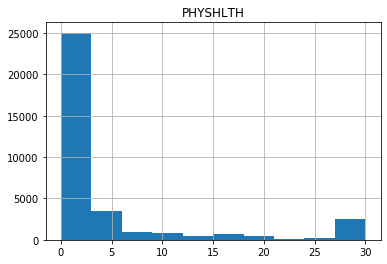

In [24]:
hist = df_phy.hist()

graphic showing the distribution of data

## 3. Generate a graphic that compares the average number of sick days for each state. 

Code to calculate the average number of sick days by state

In [25]:
group_by_state = df_phy.groupby(['_STATE']).mean()

In [26]:
group_by_state

,PHYSHLTH
_STATE,
CT,3.709823
NJ,4.388189
NY,4.167126


Create grapic of average number of sick days by state

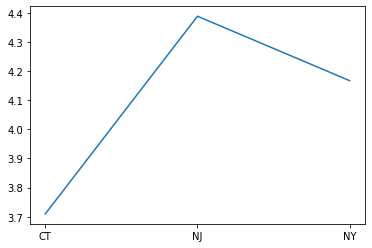

In [27]:
plt.plot(group_by_state)

## 4. Turn the number of sick days into a classification of  chronically sick people.  

Chronically sick people account for a significant proportion of the costs for health insurers. If we can identify what leads people to be chronically sick, we can address them with specific treatments.



code to create new colum for chronically sick

In [28]:
temp2 = df[['CVDINFR4', 'CVDCRHD4', 'CVDSTRK3', 'ASTHNOW','CHCSCNCR', 'CHCOCNCR', 'CHCCOPD1', 'HAVARTH3', 'ADDEPEV2', 'CHCKIDNY', 'DIABETE3']]

In [29]:
temp3 = temp2.fillna(0)

In [30]:
df_chr_all = pd.concat([df_phy[['_STATE', 'PHYSHLTH']], temp3], axis = 1)

In [31]:
df_chr_all

,_STATE,PHYSHLTH,CVDINFR4,CVDCRHD4,CVDSTRK3,ASTHNOW,CHCSCNCR,CHCOCNCR,CHCCOPD1,HAVARTH3,ADDEPEV2,CHCKIDNY,DIABETE3
49938,CT,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0
49939,CT,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49940,CT,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49941,CT,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
49942,CT,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,NY,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,2.0,3.0
303775,NY,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
303776,NY,6.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,3.0
303777,NY,0.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0,3.0


In [32]:
df_chr_all['CHRSUM'] = df_chr_all.sum(axis=1)

In [33]:
df_chr = pd.concat([df_phy, df_chr_all[['CHRSUM']]], axis = 1)

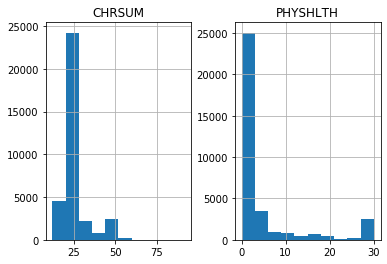

In [34]:
hist2 = df_chr.hist()

## 5. Create a graphic that compares the percentage of people labeled as 'sick' in each state. 

In [35]:
# create graphic to compare chronically sick by state

## 6. Independent Variables (categorical)

Let's take the column `SMOKDAY2` and start to prepare it so that we can see how it is possibly correlated to `PHYSHLTH`.

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Generate a graphic that compares the physical health of the different groups of 'smokers'.

In [36]:
df_smk = df[['SMOKDAY2']]

In [37]:
smok = df_smk.fillna(0).describe()

In [38]:
smok

,SMOKDAY2
count,34545.000000
mean,1.007729
std,1.349255
min,0.000000
25%,0.000000
50%,0.000000
75%,3.000000
max,9.000000


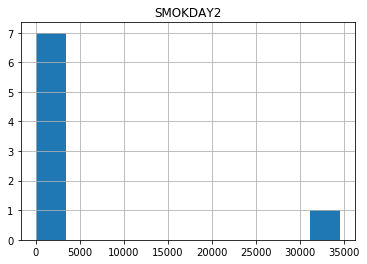

In [39]:
smok_hist = smok.hist()

## 7. Independent Variables (continuous):

Now let's look at a continuous variable (ALCDAY5) and see how that might impact a person's health. 

1. Clean up the values.
2. Calculate the descriptive statistics of the variable.
3. Generate a histogram for the variable.
4. Generate graphics that show how the responses to this variable might differ by state.
5. Calculate the correlation coefficient between `PHYSHLTH` and `ALCDAY5`.
5. Generate a graphic that shows the possible relationship between `PHYSHLTH` and `ALCDAY5`.

In [40]:
df_alc = df[['ALCDAY5']]

In [41]:
alc = df_alc.fillna(0).describe()

In [42]:
alc

,ALCDAY5
count,34545.000000
mean,445.780605
std,357.590974
min,0.000000
25%,201.000000
50%,210.000000
75%,888.000000
max,999.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x116967518>]],
      dtype=object)

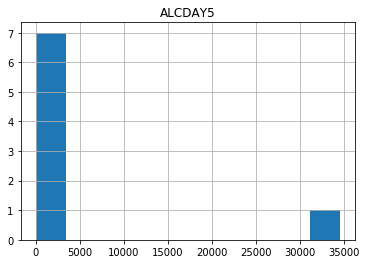

In [43]:
alc.hist()

## 8. Additional variables: Choose two additional survey items you would like to investigate do steps  6 or 7 for those variables.

In [ ]:
# your code here

## 9. Based on your initial data exploration, what are some hypotheses of what affects a person's health that you would like to further investigate?

Type out your initial hyptotheses below:

1. 

2. 

3.  

## Bonus: Create some cool graphics.  